In [1]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Set theme for graphs.
# It is also possible to set default dimensions and font scaling if we can find some values that work well in our report

sns.set_theme(context='notebook', style='whitegrid', palette='muted')

In [3]:
data_dir = Path('../../data')
data_path = data_dir / "imdb.csv"

In [4]:
data = pd.read_csv(data_path, na_values="\\N")
data.shape

(149531, 32)

### Duplicated records

In [5]:
import re

In [6]:
columns = ['originalTitle', 'rating', 'startYear',
           'runtimeMinutes', 'titleType', 'genres',
           'numRegions', 'totalCredits', 'averageRating',
           'castNumber']

In [7]:
duplicated = data.duplicated(subset=['originalTitle', 'startYear', 'titleType', 'runtimeMinutes'], keep=False)
title_is_episode = (
    data['originalTitle'].str.contains('Episode', flags=re.IGNORECASE) |
    data['originalTitle'].str.contains('B(o|ö)l(u|ü)m', flags=re.IGNORECASE) |
    data['originalTitle'].str.contains('aflevering', flags=re.IGNORECASE) |
    data['originalTitle'].str.contains('avsnitt', flags=re.IGNORECASE) |
    data['originalTitle'].str.startswith('Pilot')
)

possible_duplicates = data[duplicated & ~(title_is_episode)].sort_values(['originalTitle', 'startYear'])
possible_duplicates[columns]

/tmp/ipykernel_72164/2009721584.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  data['originalTitle'].str.contains('B(o|ö)l(u|ü)m', flags=re.IGNORECASE) |


,originalTitle,rating,startYear,runtimeMinutes,titleType,genres,numRegions,totalCredits,averageRating,castNumber
118024,1.4,"(3, 4]",2023,NaN,tvEpisode,Drama,0,2,3.3,0
118364,1.4,"(4, 5]",2023,NaN,tvEpisode,Action,0,1,4.4,0
148873,A Star is Born,"(7, 8]",2019,NaN,tvEpisode,"Adventure,Animation,Comedy",0,12,7.7,2
149324,A Star is Born,"(7, 8]",2019,NaN,tvEpisode,Comedy,0,2,7.2,1
138208,Adam Levine/Josh Gad/Maroon 5,"(6, 7]",2017,41.0,tvEpisode,"Comedy,Music,Talk-Show",1,16,7.0,9
...,...,...,...,...,...,...,...,...,...,...
27813,U.S. Cruiser 'Raleigh',"(3, 4]",1899,NaN,short,"Documentary,Short",2,3,3.7,1
87393,What the Heart Wants,"(6, 7]",2021,NaN,tvEpisode,"Drama,History,Romance",0,117,7.0,31
94012,What the Heart Wants,"(7, 8]",2021,NaN,tvEpisode,"Crime,Documentary,Drama",0,70,7.2,16
134289,Wolf in Sheep's Clothing,"(7, 8]",2016,42.0,tvEpisode,Crime,0,87,8.0,10


Some of this are genuine duplicates, while some other are mere coincidence, or tv episodes that were released in two parts with the same title.
We consider actual duplicates only records that are identical in all features and remove them from the initial data set before splitting it in training and test set. This sould ensure that the test set doesn't include any records already seen during the training.

Ten records are dropped.

In [8]:
data[data.duplicated(keep=False)].sort_values('originalTitle')

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
138209,Adam Levine/Josh Gad/Maroon 5,"(6, 7]",2017,NaN,41.0,0,15,1,10,0,...,"Comedy,Music,Talk-Show",9,3,7.0,"['\\N', 'US']",39,2,0,['stereo'],0
138208,Adam Levine/Josh Gad/Maroon 5,"(6, 7]",2017,NaN,41.0,0,15,1,10,0,...,"Comedy,Music,Talk-Show",9,3,7.0,"['\\N', 'US']",39,2,0,['stereo'],0
81846,Bryan Cranston/Julia Garner/Surfaces,"(7, 8]",2020,NaN,41.0,0,8,1,10,0,...,"Comedy,Music,Talk-Show",6,0,8.0,"['\\N', 'US']",39,14,2,['stereo'],0
81847,Bryan Cranston/Julia Garner/Surfaces,"(7, 8]",2020,NaN,41.0,0,8,1,10,0,...,"Comedy,Music,Talk-Show",6,0,8.0,"['\\N', 'US']",39,14,2,['stereo'],0
141603,Jeff Bridges/David Boreanaz/Liam Gallagher,"(6, 7]",2017,NaN,40.0,0,16,1,10,3,...,"Comedy,Talk-Show",5,0,6.4,"['\\N', 'US']",38,8,1,['stereo'],0
141602,Jeff Bridges/David Boreanaz/Liam Gallagher,"(6, 7]",2017,NaN,40.0,0,16,1,10,3,...,"Comedy,Talk-Show",5,0,6.4,"['\\N', 'US']",38,8,1,['stereo'],0
140635,Kenan Thompson/Leah Remini/Bryan Fogel/Roy May...,"(6, 7]",2017,NaN,57.0,0,20,1,10,0,...,"Comedy,Talk-Show",7,12,6.4,"['\\N', 'US']",0,1,0,[],0
140634,Kenan Thompson/Leah Remini/Bryan Fogel/Roy May...,"(6, 7]",2017,NaN,57.0,0,20,1,10,0,...,"Comedy,Talk-Show",7,12,6.4,"['\\N', 'US']",0,1,0,[],0
83076,Masters of the Universe,"(7, 8]",2020,NaN,92.0,0,18,1,10,2,...,Comedy,2,0,7.5,"['\\N', 'DE']",0,2,0,[],0
83077,Masters of the Universe,"(7, 8]",2020,NaN,92.0,0,18,1,10,2,...,Comedy,2,0,7.5,"['\\N', 'DE']",0,2,0,[],0


In [9]:
data = data.drop_duplicates(keep='first')
data.shape

(149521, 32)

## Train test split

First, we split the dataset in training and test set, keeping 70% of the records for training.

We perform data exploration only on the training set in order to prevent data leakage. Any transformation performed on the training set will be also applied on the test set.

In [10]:
train, test = train_test_split(data, train_size=.7, shuffle=True, random_state=42)

In [11]:
print("training set:", train.shape)
print("test set:", test.shape)

training set: (104664, 32)
test set: (44857, 32)


## Data exploration

In [12]:
train.head()

,originalTitle,rating,startYear,endYear,runtimeMinutes,awardWins,numVotes,worstRating,bestRating,totalImages,...,genres,castNumber,companiesNumber,averageRating,regions,externalLinks,writerCredits,directorsCredits,soundMixes,quotesTotal
9488,Kaala Sona,"(6, 7]",1975,NaN,137.0,0,93,1,10,14,...,"Action,Thriller",30,27,6.2,"['\\N', 'PT', 'IN']",2,3,1,['mono'],0
36627,Deu Veado na Cabeça,"(3, 4]",1982,NaN,90.0,0,34,1,10,1,...,Comedy,14,3,3.1,"['\\N', 'BR']",0,3,1,[],0
59652,Who Gets to Keep Togepy!?,"(7, 8]",1998,NaN,22.0,0,528,1,10,2,...,"Action,Adventure,Animation",21,22,7.5,"['\\N', 'JP']",0,6,1,['stereo'],0
121024,Momma Croc,"(6, 7]",2011,NaN,NaN,0,10,1,10,0,...,"Adventure,Animation,Comedy",0,3,6.1,['\\N'],0,1,2,[],0
13082,Mon ami le traître,"(5, 6]",1988,NaN,120.0,0,192,1,10,1,...,"Drama,War",41,4,6.0,"['\\N', 'XWW', 'SUHH', 'CA', 'FR', 'HU', 'IT',...",2,5,1,['mono'],0


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104664 entries, 9488 to 121962
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   originalTitle                104664 non-null  object 
 1   rating                       104664 non-null  object 
 2   startYear                    104664 non-null  int64  
 3   endYear                      3935 non-null    float64
 4   runtimeMinutes               76479 non-null   float64
 5   awardWins                    104664 non-null  int64  
 6   numVotes                     104664 non-null  int64  
 7   worstRating                  104664 non-null  int64  
 8   bestRating                   104664 non-null  int64  
 9   totalImages                  104664 non-null  int64  
 10  totalVideos                  104664 non-null  int64  
 11  totalCredits                 104664 non-null  int64  
 12  criticReviewsTotal           104664 non-null  int64  
 13  t

We have some missing values for endYear, RuntimeMinutes, CountryOfOrigin and Genres.
Data for endYear is absent in most titles.

<Axes: xlabel='startYear', ylabel='endYear'>

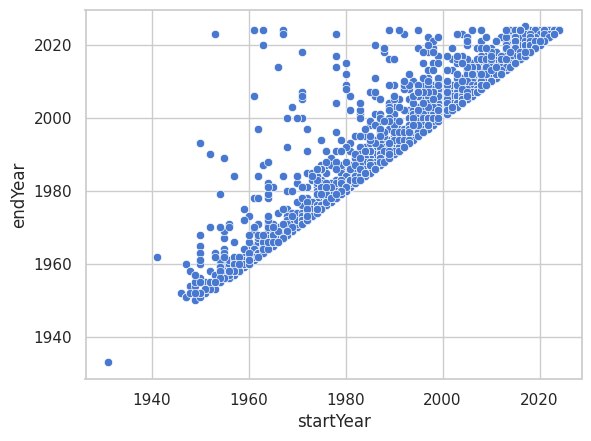

In [14]:
sns.scatterplot(train, x='startYear', y='endYear')

<Axes: xlabel='numVotes', ylabel='ratingCount'>

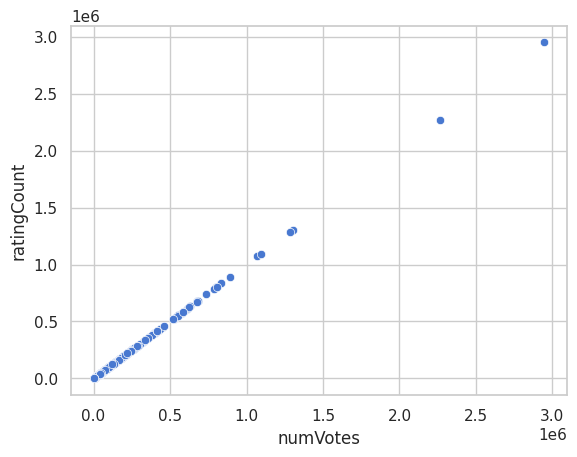

In [15]:
sns.scatterplot(train, x='numVotes', y='ratingCount')

We remove features bestRating, worstRating, isRatable, which have variance = 0 and therefore are uninformative.
We also remove endYear, ratingCount (almost always identical to numVotes), and isAdult, which is redundant with genre Adult.

In [16]:
to_drop = ['bestRating', 'worstRating','endYear','isRatable', 'isAdult', 'ratingCount']
train[to_drop + ['numVotes']].describe()

,bestRating,worstRating,endYear,isAdult,ratingCount,numVotes
count,104664.0,104664.0,3935.000000,104664.000000,1.046640e+05,1.046640e+05
mean,10.0,1.0,2001.337484,0.018545,1.024992e+03,1.024427e+03
std,0.0,0.0,18.067854,0.134912,1.927516e+04,1.926760e+04
min,10.0,1.0,1933.000000,0.000000,5.000000e+00,5.000000e+00
25%,10.0,1.0,1989.000000,0.000000,1.200000e+01,1.200000e+01
50%,10.0,1.0,2005.000000,0.000000,2.800000e+01,2.800000e+01
75%,10.0,1.0,2017.000000,0.000000,1.070000e+02,1.070000e+02
max,10.0,1.0,2025.000000,1.000000,2.948790e+06,2.947931e+06


In [17]:
train.drop(to_drop, axis=1, inplace=True)

In [18]:
train.describe()

,startYear,runtimeMinutes,awardWins,numVotes,totalImages,totalVideos,totalCredits,criticReviewsTotal,awardNominationsExcludeWins,numRegions,userReviewsTotal,castNumber,companiesNumber,averageRating,externalLinks,writerCredits,directorsCredits,quotesTotal
count,104664.000000,76479.000000,104664.000000,1.046640e+05,104664.000000,104664.00000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000,104664.000000
mean,1994.872401,56.911675,0.303782,1.024427e+03,9.251911,0.22513,57.352385,2.147329,0.404380,2.834403,5.351898,19.421224,5.816403,6.872846,5.134191,2.015096,0.947804,1.062811
std,24.929007,45.289036,2.791837,1.926760e+04,90.044761,4.45736,155.144619,13.391469,4.038684,5.245262,67.477167,83.414963,19.525859,1.348288,19.217412,2.488866,0.822643,6.736098
min,1878.000000,0.000000,0.000000,5.000000e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1981.000000,24.000000,0.000000,1.200000e+01,1.000000,0.00000,16.000000,0.000000,0.000000,1.000000,0.000000,5.000000,1.000000,6.100000,0.000000,0.000000,1.000000,0.000000
50%,1999.000000,48.000000,0.000000,2.800000e+01,1.000000,0.00000,34.000000,0.000000,0.000000,1.000000,0.000000,12.000000,2.000000,7.100000,1.000000,1.000000,1.000000,0.000000
75%,2015.000000,87.000000,0.000000,1.070000e+02,4.000000,0.00000,64.000000,0.000000,0.000000,3.000000,1.000000,21.000000,5.000000,7.800000,3.000000,3.000000,1.000000,0.000000
max,2024.000000,3000.000000,446.000000,2.947931e+06,20586.000000,949.00000,25218.000000,628.000000,650.000000,75.000000,11289.000000,10649.000000,597.000000,10.000000,712.000000,51.000000,58.000000,1084.000000


Records with suspiciously high values for directorsCredit are either compilations of products by several different directors, or TV episodes for which all directors of the tv series were recorded for the episode.

In [19]:
more_than_10_directors = train[train['directorsCredits'] > 10][['originalTitle', 'titleType', 'directorsCredits', 'genres', 'startYear']]
more_than_10_directors.sort_values('directorsCredits', ascending=False)

,originalTitle,titleType,directorsCredits,genres,startYear
88044,Is There Anybody Out There? Young Voices from ...,movie,58,Documentary,2021
107646,The King of Ads,movie,50,Documentary,1991
67564,Chacun son cinéma ou Ce petit coup au coeur qu...,movie,36,"Comedy,Drama",2007
75434,30/30 Vision: 3 Decades of Strand Releasing,movie,33,"Comedy,Drama",2019
124388,Animated Soviet Propaganda,video,31,"Animation,Documentary",1997
14036,Contre l'oubli,movie,31,Drama,1991
63292,The Ghost of Paradise Estate: Part 2,tvEpisode,22,"Adventure,Animation,Family",1986
63193,The Quest of the Princess Ponies: Part 1,tvEpisode,22,"Adventure,Animation,Family",1987
62675,The End of Flutter Valley: Part 6,tvEpisode,22,"Adventure,Animation,Family",1986
62431,The End of Flutter Valley: Part 1,tvEpisode,22,"Adventure,Animation,Family",1986


In [20]:
more_than_10_directors['titleType'].value_counts()

titleType
tvEpisode    22
movie        18
video         6
tvMovie       1
Name: count, dtype: int64

### Distribution of categorical variables

In [21]:
cat_vars = (train.dtypes[train.dtypes.isin(['object', 'bool'])]).index
train[cat_vars]

,originalTitle,rating,titleType,countryOfOrigin,genres,regions,soundMixes
9488,Kaala Sona,"(6, 7]",movie,['IN'],"Action,Thriller","['\\N', 'PT', 'IN']",['mono']
36627,Deu Veado na Cabeça,"(3, 4]",movie,['BR'],Comedy,"['\\N', 'BR']",[]
59652,Who Gets to Keep Togepy!?,"(7, 8]",tvEpisode,['JP'],"Action,Adventure,Animation","['\\N', 'JP']",['stereo']
121024,Momma Croc,"(6, 7]",tvEpisode,NaN,"Adventure,Animation,Comedy",['\\N'],[]
13082,Mon ami le traître,"(5, 6]",movie,['FR'],"Drama,War","['\\N', 'XWW', 'SUHH', 'CA', 'FR', 'HU', 'IT',...",['mono']
...,...,...,...,...,...,...,...
119883,The Real Housewives of Grenada,"(6, 7]",tvEpisode,NaN,Reality-TV,['\\N'],[]
103698,13 Sins,"(6, 7]",movie,['US'],"Horror,Thriller","['\\N', 'NL', 'PH', 'SE', 'SG', 'TH', 'US', 'Z...",[]
131936,Skinny Fat Girl,"(6, 7]",short,['US'],"Comedy,Drama,Music","['\\N', 'US']",[]
146877,The Third Match: On The Edge,"(9, 10]",tvEpisode,NaN,"Action,Animation,Family",['\\N'],[]


#### Preprocessing of lists

In [22]:
from ast import literal_eval

`\\N` is prepended to all lists of regions. We remove it from all records since it creates a discrepance with the count of regions in the data set.

In [23]:
train[['regions', 'numRegions']]

,regions,numRegions
9488,"['\\N', 'PT', 'IN']",2
36627,"['\\N', 'BR']",1
59652,"['\\N', 'JP']",1
121024,['\\N'],0
13082,"['\\N', 'XWW', 'SUHH', 'CA', 'FR', 'HU', 'IT',...",10
...,...,...
119883,['\\N'],0
103698,"['\\N', 'NL', 'PH', 'SE', 'SG', 'TH', 'US', 'Z...",39
131936,"['\\N', 'US']",1
146877,['\\N'],0


In [24]:
def robust_literal_eval(value):
    try:
        return literal_eval(value)
    except ValueError:
        return list()

def preprocess_regions(value):
    values_list = robust_literal_eval(value)
    try:
        values_list.remove('\\N')
    except ValueError:
        pass
    finally:
        return values_list

In [25]:
train['countryOfOrigin'] = train['countryOfOrigin'].apply(robust_literal_eval)
train['regions'] = train['regions'].apply(preprocess_regions)
train['soundMixes'] = train['soundMixes'].apply(robust_literal_eval)
train['genres'] = train['genres'].str.split(',')

In [26]:
train[cat_vars]

,originalTitle,rating,titleType,countryOfOrigin,genres,regions,soundMixes
9488,Kaala Sona,"(6, 7]",movie,[IN],"[Action, Thriller]","[PT, IN]",[mono]
36627,Deu Veado na Cabeça,"(3, 4]",movie,[BR],[Comedy],[BR],[]
59652,Who Gets to Keep Togepy!?,"(7, 8]",tvEpisode,[JP],"[Action, Adventure, Animation]",[JP],[stereo]
121024,Momma Croc,"(6, 7]",tvEpisode,[],"[Adventure, Animation, Comedy]",[],[]
13082,Mon ami le traître,"(5, 6]",movie,[FR],"[Drama, War]","[XWW, SUHH, CA, FR, HU, IT, XWG, ES, SE, PL]",[mono]
...,...,...,...,...,...,...,...
119883,The Real Housewives of Grenada,"(6, 7]",tvEpisode,[],[Reality-TV],[],[]
103698,13 Sins,"(6, 7]",movie,[US],"[Horror, Thriller]","[NL, PH, SE, SG, TH, US, ZA, AR, CL, ES, AE, P...",[]
131936,Skinny Fat Girl,"(6, 7]",short,[US],"[Comedy, Drama, Music]",[US],[]
146877,The Third Match: On The Edge,"(9, 10]",tvEpisode,[],"[Action, Animation, Family]",[],[]


#### CanHaveEpisodes

In [27]:
pd.crosstab(train['canHaveEpisodes'], train['titleType'])

titleType,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
canHaveEpisodes,,,,,,,,,,
False,26053,11447,49588,0,4195,0,181,822,3612,1251
True,0,1,0,1128,1,6385,0,0,0,0


In [28]:
train[(train['canHaveEpisodes']) & (train['titleType'].isin(['short', 'tvMovie']))][columns]

,originalTitle,rating,startYear,runtimeMinutes,titleType,genres,numRegions,totalCredits,averageRating,castNumber
117934,"The Murder of Lyn Dawson: The Teacher, the Gro...","(6, 7]",2023,45.0,tvMovie,[Documentary],1,30,6.6,0
114248,The Haunting,"(5, 6]",2023,31.0,short,"[Horror, Short]",1,17,6.0,4


Only two records with `canHaveEpisodes` set to true have `titleType` different from tvSeries of tvMiniSeries. This may indicate some errors committed when entering the data. We can see that one of the two records is in fact a tv Series with 4 episodes, while the other is probably a short (only one episode on the imdb page). We correct the two records accordingly.

In [29]:
train.loc[117934, 'titleType'] = 'tvSeries'
train.loc[114248, 'canHaveEpisodes'] = False

In [30]:
pd.crosstab(train['canHaveEpisodes'], train['titleType'])

titleType,movie,short,tvEpisode,tvMiniSeries,tvMovie,tvSeries,tvShort,tvSpecial,video,videoGame
canHaveEpisodes,,,,,,,,,,
False,26053,11448,49588,0,4195,0,181,822,3612,1251
True,0,0,0,1128,0,6386,0,0,0,0


#### TitleType

<Axes: ylabel='titleType'>

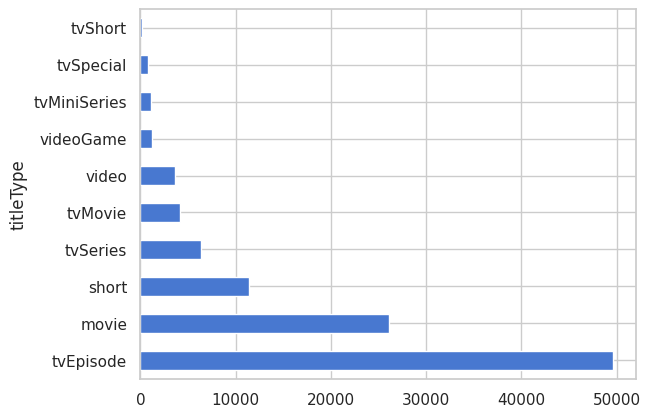

In [31]:
train['titleType'].value_counts().plot.barh()

It should be noted that about one third of all records are tv episodes (in the other dataset the majority class was movies).

In [32]:
def aggregate_titleType(value):
    return value if value in ('tvEpisode', 'movie', 'short', 'tvSeries', 'tvMovie') else 'other'

train['aggrTitleType'] = train['titleType'].apply(aggregate_titleType)

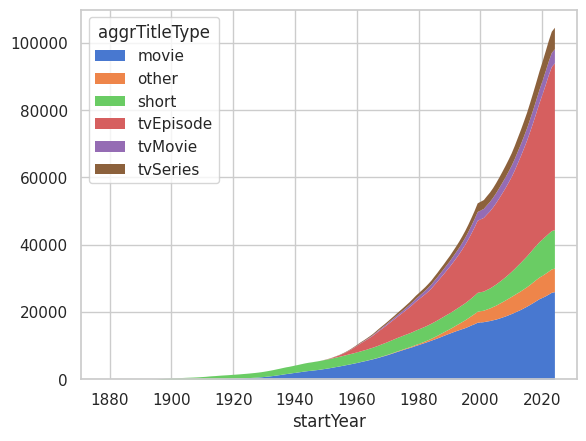

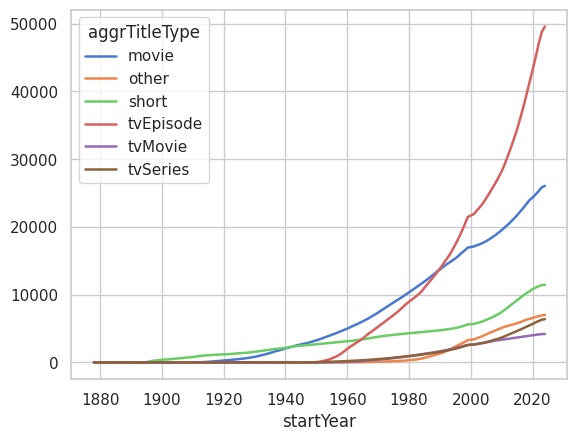

In [33]:
titles_by_year = pd.crosstab(train['startYear'], train['aggrTitleType'])
g1 = titles_by_year.cumsum().plot(kind='area', linewidth=0)
g2 = titles_by_year.cumsum().plot(linewidth=1.8)


#### Rating

<Axes: >

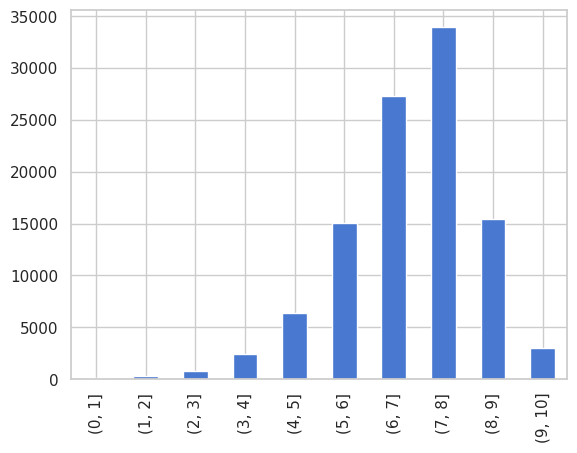

In [34]:
pd.Categorical(train['rating']).value_counts().plot.bar()

#### Genres

<Axes: ylabel='genres'>

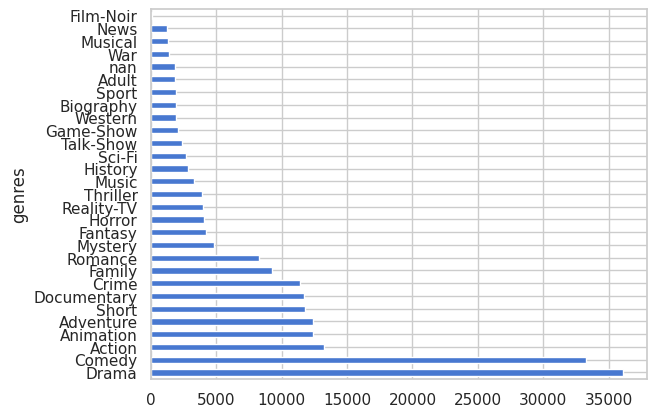

In [35]:
genres_train = train.explode('genres')
genres_train['genres'].value_counts(dropna=False).plot.barh()

In [36]:
train[train['genres'].isna()]['titleType'].value_counts()

titleType
movie           1071
tvSeries         281
tvMovie          144
video            112
tvSpecial         84
videoGame         78
tvEpisode         76
tvMiniSeries      41
Name: count, dtype: int64

#### CountryOfOrigin

<Axes: ylabel='countryOfOrigin'>

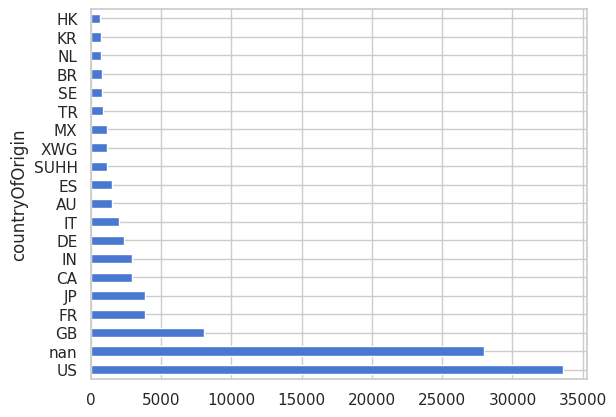

In [37]:
country_train = train.explode('countryOfOrigin')
country_counts = country_train['countryOfOrigin'].value_counts(dropna=False)
country_counts.to_frame().sort_values('count', ascending=False).head(20).plot.barh(legend=False)

In [38]:
top_countries = list(country_train['countryOfOrigin'].value_counts().to_frame().sort_values('count', ascending=False).head(10).index)

#### Region

<Axes: ylabel='regions'>

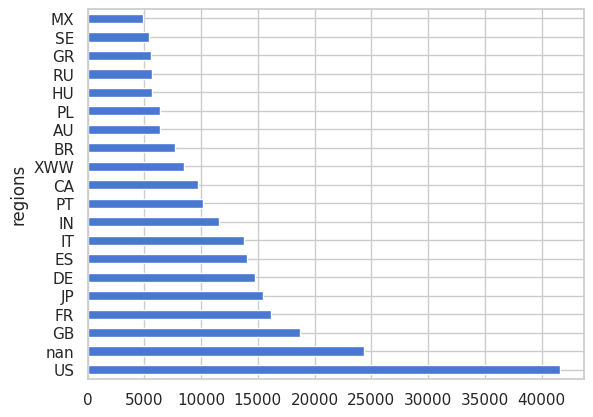

In [39]:
train_region = train.explode('regions')
region_counts = train_region['regions'].value_counts(dropna=False)
region_counts.to_frame().sort_values('count', ascending=False).head(20).plot.barh(legend=False)

In [40]:
has_countries = train['countryOfOrigin'].astype('bool')
no_regions = train['numRegions'] == 0
train[no_regions & has_countries][list(cat_vars) + ['startYear', 'numRegions']]

,originalTitle,rating,titleType,countryOfOrigin,genres,regions,soundMixes,startYear,numRegions
108111,Deadstream (2022),"(6, 7]",tvEpisode,[US],[Documentary],[],[],2022,0
113539,Three Zones & a Baby,"(6, 7]",tvEpisode,[CA],"[Action, Adventure, Animation]",[],[],2014,0


#### soundMixes

In [41]:
def aggregate_soundMixes(value):
    if value in ('stereo', 'mono', 'silent'):
        return value
    if 'dolby' in value:
        return 'dolby'
    else:
        return 'other'

In [42]:
sound_train = train.explode('soundMixes')


<Axes: ylabel='soundMixes'>

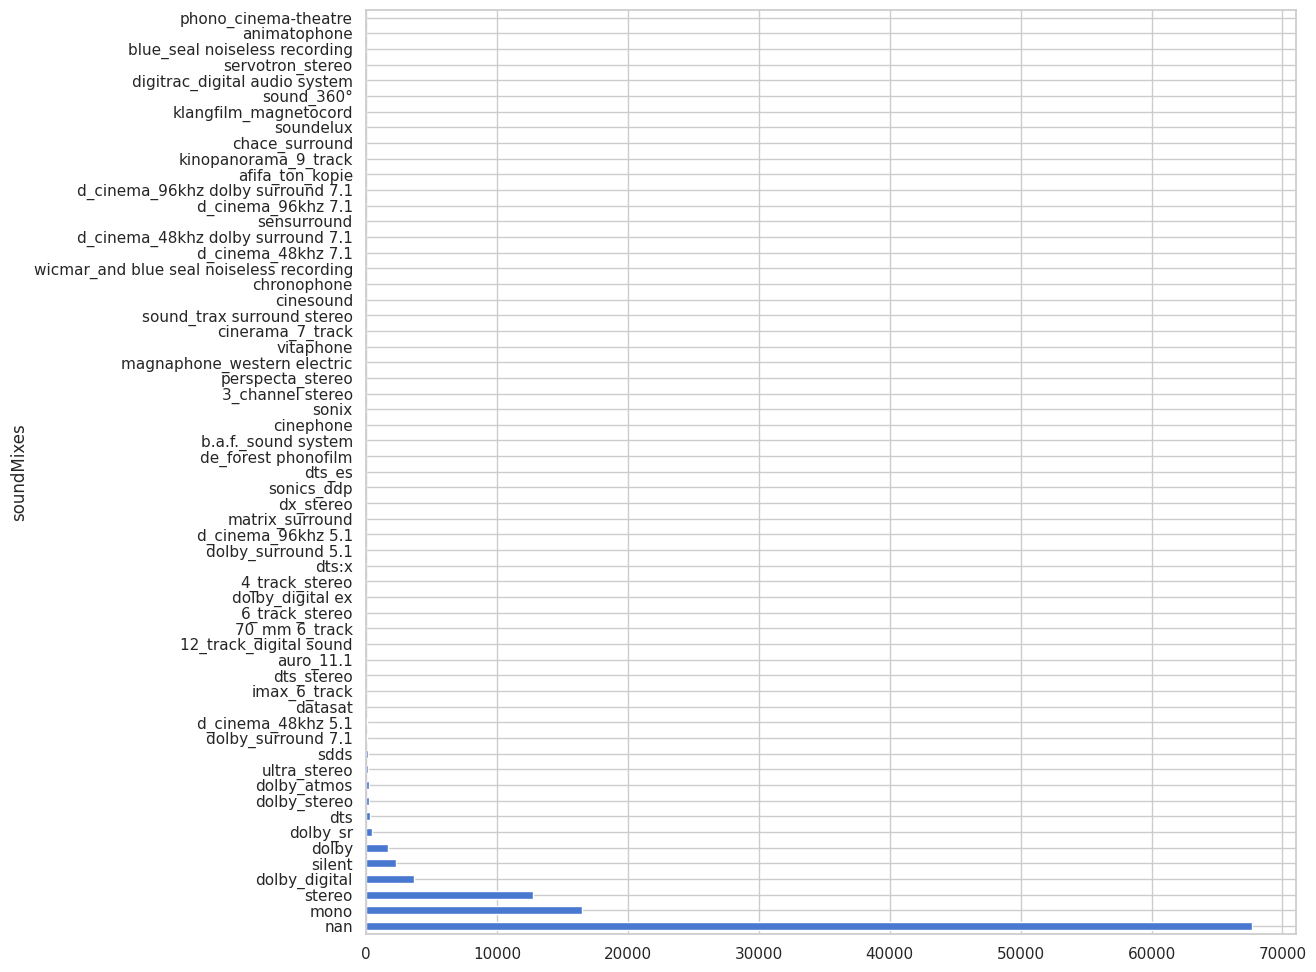

In [43]:
plt.figure(figsize=(12, 12))
sound_train['soundMixes'].value_counts(dropna=False).plot.barh()

<Axes: ylabel='soundMixes'>

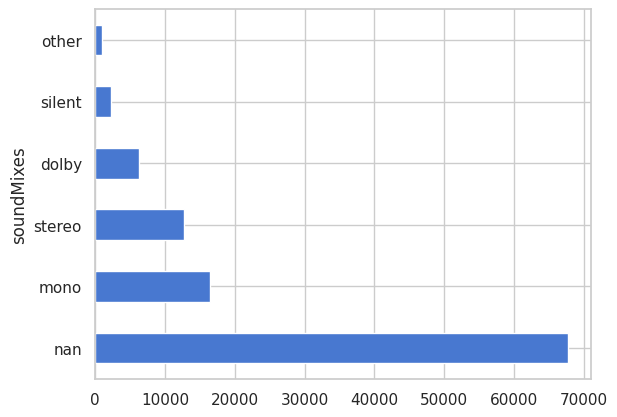

In [44]:
sound_train['soundMixes'] = sound_train['soundMixes'].map(aggregate_soundMixes, na_action='ignore')
sound_train['soundMixes'].value_counts(dropna=False).plot.barh()

This variable has too many missing values to be in some way useful. We should probably drop it.

In [45]:
train['silent'] = train['soundMixes'].apply(lambda x: 'silent' in x)
train['silent'].value_counts()

silent
False    102359
True       2305
Name: count, dtype: int64

<Axes: xlabel='startYear'>

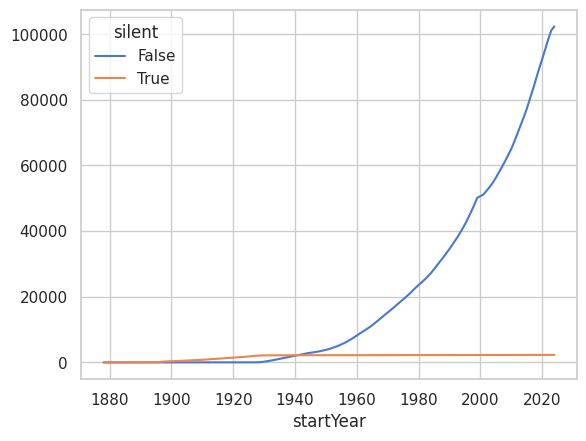

In [46]:
pd.crosstab(train['startYear'], train['silent']).cumsum().plot()
